# Introduction

### Motivation
In this project, our goal is to identify VIP customers using the RFM (Recency, Frequency, Monetary) technique. This approach allows us to segment customers based on their recent purchasing behavior, frequency of purchases, and monetary value. By identifying VIP customers, we can tailor targeted marketing strategies, offer personalized services, and ultimately enhance business revenue.

# Import Python libraries

In [1]:
#Importing all the important Librarirs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importing Dataset

In [2]:
# Loading the dataset
df = pd.read_csv("C:/Users/sagri/Downloads/Ecommerce data.csv", encoding='latin-1')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France,NaN


# Structured Based Data Exploration

## Purpose of EDA:
* To understand data distribution, detect outliers, and identify patterns.
* To recognize which features are most relevant for identifying VIP customers.


In [4]:
#top 5 rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [5]:
#last 5 rows of the dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France,NaN
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,7-Dec-17,4.95,12680.0,France,NaN


In [6]:
#descriptive stats of unnamed column
df['Unnamed: 8'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 8, dtype: float64

In [7]:
#droping the unnamed column since its not useful
df.drop('Unnamed: 8', axis=1, inplace=True)

In [8]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France


In [9]:
#total number of rows and column in the dataframe
df.shape

(541909, 8)

In [10]:
#different datatypes present in our dataset in our case there are three datatypes present.
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [11]:
#converting into proper datatype
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Quantity'] = pd.to_numeric(df['Quantity'])
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'])

In [12]:
## Display the count of non-null values for each column in the DataFrame
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [13]:
# Checking if there is any duplicate rows
duplicate_rows = df[df.duplicated()]

if len(duplicate_rows) > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")



Duplicate rows found:
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

       InvoiceDate  UnitPrice  CustomerID         Country  
517     2016-11-2

In [14]:
# Removing duplicate rows
df = df.drop_duplicates()
print("Shape of DataFrame after removing duplicates:", df.shape)


Shape of DataFrame after removing duplicates: (536640, 8)


In [15]:
#descriptive statstics of numerical values
df.describe()

,Quantity,UnitPrice,CustomerID
count,536640.000000,536640.000000,401603.000000
mean,9.620043,4.632661,15281.162093
std,219.130360,97.233208,1714.008032
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [16]:
# Descriptive statistics of all the columns
df.describe(include='all')


C:\Users\sagri\AppData\Local\Temp\ipykernel_21472\2895395756.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,536640,536640,535186,536640.000000,536640,536640.000000,401603.000000,536640
unique,25900,4070,4223,NaN,305,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2017-12-03 00:00:00,NaN,NaN,United Kingdom
freq,1114,2301,2357,NaN,5292,NaN,NaN,490299
first,NaN,NaN,NaN,NaN,2016-11-29 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2017-12-07 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.620043,NaN,4.632661,15281.162093,NaN
std,NaN,NaN,NaN,219.130360,NaN,97.233208,1714.008032,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13939.000000,NaN


In [17]:
#Display concise summary information about the DataFrame, including data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536640 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536640 non-null  object        
 1   StockCode    536640 non-null  object        
 2   Description  535186 non-null  object        
 3   Quantity     536640 non-null  int64         
 4   InvoiceDate  536640 non-null  datetime64[ns]
 5   UnitPrice    536640 non-null  float64       
 6   CustomerID   401603 non-null  float64       
 7   Country      536640 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB
None



Handling Missing Values:

In [18]:
#checking if there is any null value
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


In [19]:
# Handling missing values by dropping
df.dropna(inplace=True) 
#dealing with the missing value 

C:\Users\sagri\AppData\Local\Temp\ipykernel_21472\1033170074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [20]:
#top 5 rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom


In [21]:
#finding number of unique id's in the Customer_id column
df['CustomerID'].nunique()

4372

## Feature Engneering

### Country


In [22]:

# Using the unique() function to get the unique values in the 'Country' column
unique_countries = df['Country'].unique()

# Geting the number of unique countries
num_countries = len(unique_countries)

print("Number of different countries:", num_countries)
print("List of countries:", unique_countries)


Number of different countries: 37
List of countries: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


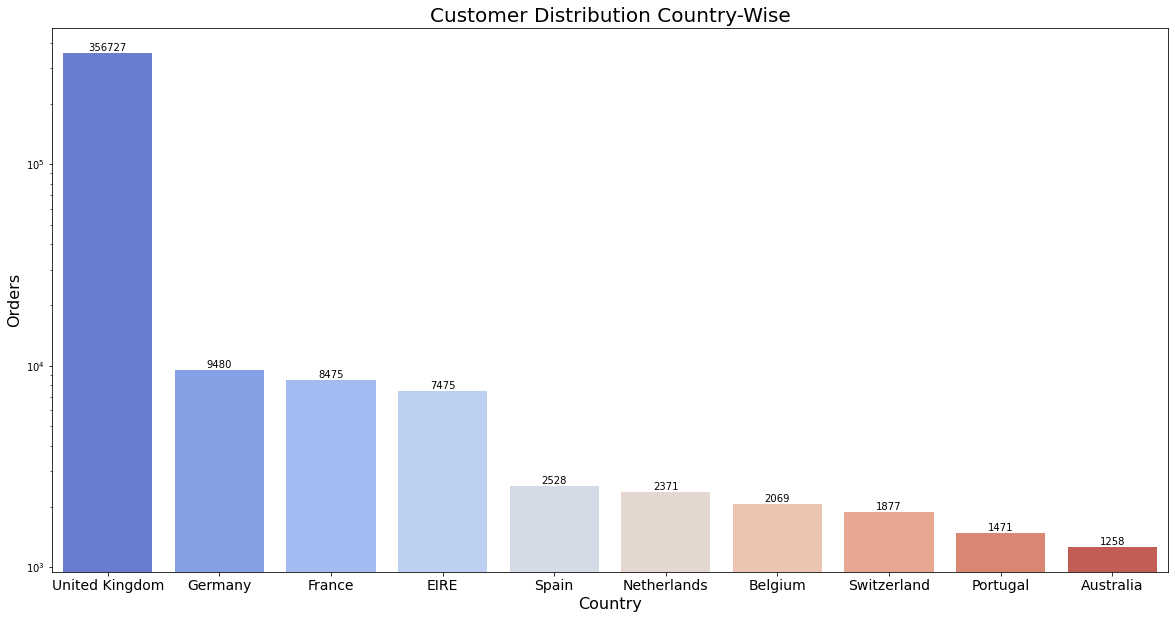

In [23]:
#Graph to represent number of orders made from different countries
custCountry = df['Country'].value_counts().reset_index(drop = False).head(10)
custCountry.columns = ['Country','Counts'] # renaming the columns
plt.figure(figsize = (20,10))
ax =sns.barplot(x= 'Country', y = 'Counts' , data = custCountry, palette = 'coolwarm')
ax.bar_label(ax.containers[0])
plt.title("Customer Distribution Country-Wise",fontsize=20)
plt.ylabel("Orders",fontsize = 16)
plt.xlabel('Country',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yscale('log')

The above graph will give us a visualization of the distribution of customers across different countries. The x-axis represents the countries, and the y-axis represents the number of orders placed by customers from each country. The height of each bar indicates the count of orders, with taller bars indicating a higher number of orders. As one can clearly see that United Kingdom has maximum number of customers and Australia has the least.

In [24]:
# Grouping the DataFrame by 'Country' and count the number of purchases in each country
country_purchase_count = df.groupby('Country').size()

# Finding the country with the maximum number of purchases
max_purchase_country = country_purchase_count.idxmax()
max_purchase_count = country_purchase_count.max()

print("Country with the maximum number of purchases:", max_purchase_country)
print("Number of purchases in that country:", max_purchase_count)


Country with the maximum number of purchases: United Kingdom
Number of purchases in that country: 356727


In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom


### Quantity

<AxesSubplot:ylabel='Quantity'>

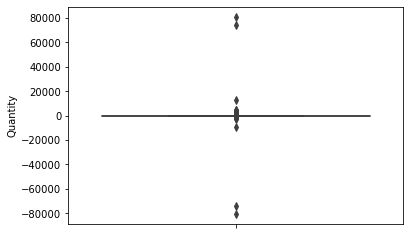

In [26]:
# Visualize the distribution of the 'Quantity' column using a box plot
sns.boxplot(y = 'Quantity', data=df)

This indicates that there are values in the Quantity column that are less than 0, typically occurring when a purchase is canceled.

In [27]:
#Shows all the negative values in quantity column
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2016-11-29,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2016-11-29,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2016-11-29,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2016-11-29,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2016-11-29,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2017-12-07,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2017-12-07,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2017-12-07,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2017-12-07,1.25,17315.0,United Kingdom


Now, we can generate a distinct dataframe specifically for canceled purchases.

In [28]:
cancelled_purchases = df[df['Quantity'] < 0]
#we modified our dataframe data to contain only purchased product
df = df[df['Quantity']>0] 
# check min to confirm for positive quantity
df['Quantity'].min() 

1

In [29]:
#dataframe for cancelled items
cancelled_purchases

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2016-11-29,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2016-11-29,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2016-11-29,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2016-11-29,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2016-11-29,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2017-12-07,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2017-12-07,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2017-12-07,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2017-12-07,1.25,17315.0,United Kingdom


In [30]:
# Filter out cancelled purchases
df = df[df['Quantity'] > 0]


In [31]:
#checking the dimensions of the dataframe
df.shape

(392731, 8)

### InvoiceDate
Plotting a graph for invoice date column to check if there's any outlier present in the column.

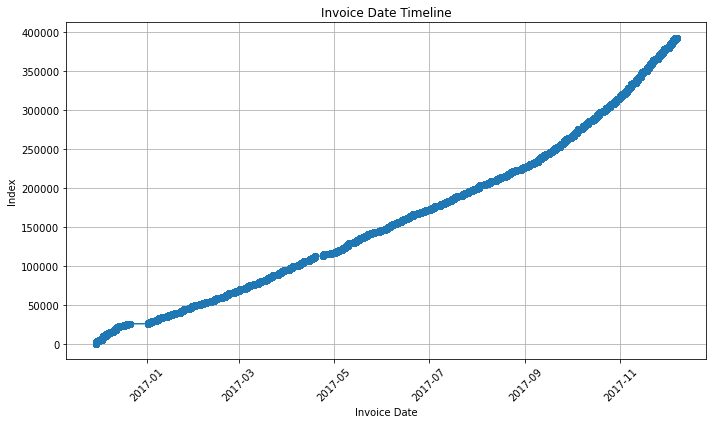

In [32]:

# Converting 'InvoiceDate' to datetime 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Sorting DataFrame by 'InvoiceDate'
df_sorted = df.sort_values('InvoiceDate')

# Plotting InvoiceDate on a timeline
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['InvoiceDate'], range(len(df_sorted)), marker='o', linestyle='-')
plt.title('Invoice Date Timeline')
plt.xlabel('Invoice Date')
plt.ylabel('Index')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
# Find minimum and maximum dates
min_date = df['InvoiceDate'].min()
max_date = df['InvoiceDate'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2016-11-29 00:00:00
Maximum Date: 2017-12-07 00:00:00


### Unit Price

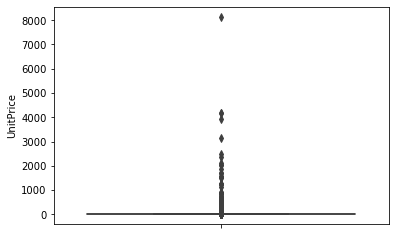

In [34]:
# Visualize the distribution of the 'UnitPrice' column using a box plot
sns.boxplot(y='UnitPrice', data=df, showfliers=True)  
plt.show()


It appears that there are no negative values in the `UnitPrice` column that are less than 0 which indicates there is no debt from any customer.

In [35]:
df['UnitPrice'].min()

0.0

In [36]:
#creating a column for total
df['Total'] = df['Quantity']*df['UnitPrice']

### RMF MODEL

To identify VIP clients in the e-commerce customer segmentation project, I will employ the RFM (Recency, Frequency, Monetary) model. This model utilizes key attributes to gauge customer behavior and distinguish VIP clients. Using the provided dataset, I will create a new RMF table to analyze the unique activity of customers. This table will allow me to assess each customer's recency, frequency, and monetary values, enabling the identification of VIP clients based on their purchasing patterns.

In [37]:
#creating a new column
df['CheckoutPrice'] = df['UnitPrice'] * df['Quantity']

In [38]:
#creating a new dataframe rfm
recent_date = df['InvoiceDate'].max()
rfm = df.groupby('CustomerID').agg({'InvoiceDate' : lambda date : (recent_date - date.max()).days ,
'InvoiceNo' : lambda num :num.nunique() ,
'CheckoutPrice' : lambda CheckoutPrice :CheckoutPrice.sum()} )
rfm


,InvoiceDate,InvoiceNo,CheckoutPrice
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,2,178.05


This code snippet computes the RFM (Recency, Frequency, Monetary) metrics for each customer in the dataset. The 'Recency' metric is derived by calculating the number of days between the most recent invoice date and the reference date, which is the maximum invoice date in the dataset. 'Frequency' represents the count of unique invoice numbers for each customer, indicating the frequency of their purchases. 'Monetary' is computed as the total checkout price (quantity multiplied by unit price) for each customer, reflecting their total monetary value spent. The resulting DataFrame 'rfm' consolidates these metrics, grouped by the unique 'CustomerID', facilitating customer segmentation and personalized marketing strategies.

In [39]:
# Calculate Recency
recent_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)
df['Recency'] = (recent_date - df.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days
 
# Set a maximum threshold for recency score
max_recency_threshold = 365  # Maximum number of days considered for recency
df['Recency'] = df['Recency'].clip(0, max_recency_threshold)

# Calculate Recency Score
df['RecencyScore'] = 10 - df['Recency'].floordiv(30)
# Define the snapshot date
recent_date = df['InvoiceDate'].max()

# Calculate Frequency
df['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')
df['FrequencyScore'] = df['Frequency'].clip(1, 10)
# Calculate Monetary
df['Monetary'] = df['Quantity'] * df['UnitPrice']

# Group by CustomerID and sum the Monetary values
customer_monetary_value = df.groupby('CustomerID')['Monetary'].sum().reset_index()

# Calculate Monetary score without using a benchmark value
customer_monetary_value['MonetaryScore'] = pd.qcut(customer_monetary_value['Monetary'], 10, labels=False, duplicates='drop') + 1

# Merge the RFM scores
rfm_table = pd.merge(df.groupby('CustomerID')[['RecencyScore', 'FrequencyScore']].mean().reset_index(), customer_monetary_value[['CustomerID', 'MonetaryScore']], on='CustomerID')

# Display the RMF table
print(rfm_table.head())


   CustomerID  RecencyScore  FrequencyScore  MonetaryScore
0     12346.0           0.0             1.0             10
1     12347.0          10.0             7.0             10
2     12348.0           8.0             4.0              8
3     12349.0          10.0             1.0              8
4     12350.0           0.0             1.0              3


In [40]:
# Filtering the DataFrame to show only rows where RecencyScore is more than 0
rfm_table = rfm_table[rfm_table['RecencyScore'] > 0]

# Display the DataFrame containing values>0 as RecencyScore
rfm_table


,CustomerID,RecencyScore,FrequencyScore,MonetaryScore
1,12347.0,10.0,7.0,10
2,12348.0,8.0,4.0,8
3,12349.0,10.0,1.0,8
5,12352.0,9.0,8.0,9
6,12353.0,4.0,1.0,1
...,...,...,...,...
4334,18280.0,1.0,1.0,2
4335,18281.0,4.0,1.0,1
4336,18282.0,10.0,2.0,2
4337,18283.0,10.0,10.0,8


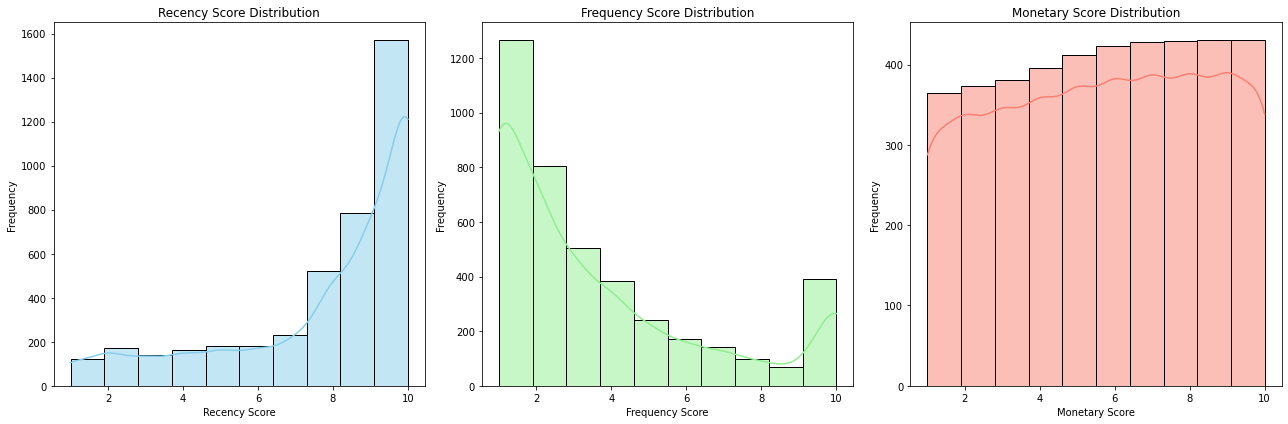

In [41]:
# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Visualize Recency Score distribution
sns.histplot(rfm_table['RecencyScore'], bins=10, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Recency Score Distribution')
axes[0].set_xlabel('Recency Score')
axes[0].set_ylabel('Frequency')

# Visualize Frequency Score distribution
sns.histplot(rfm_table['FrequencyScore'], bins=10, kde=True, color='lightgreen', ax=axes[1])
axes[1].set_title('Frequency Score Distribution')
axes[1].set_xlabel('Frequency Score')
axes[1].set_ylabel('Frequency')

# Visualize Monetary Score distribution
sns.histplot(rfm_table['MonetaryScore'], bins=10, kde=True, color='salmon', ax=axes[2])
axes[2].set_title('Monetary Score Distribution')
axes[2].set_xlabel('Monetary Score')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


The three histograms represents the distribution of the RFM (Recency, Frequency, Monetary) scores. The first subplot shows the distribution of Recency scores, indicating how recently customers made purchases. The second subplot visualizes the Frequency scores, representing the frequency of customer purchases. Lastly, the third subplot displays the distribution of Monetary scores, reflecting the monetary value of customer transactions. These histograms provide insights into the distribution patterns of RFM scores.

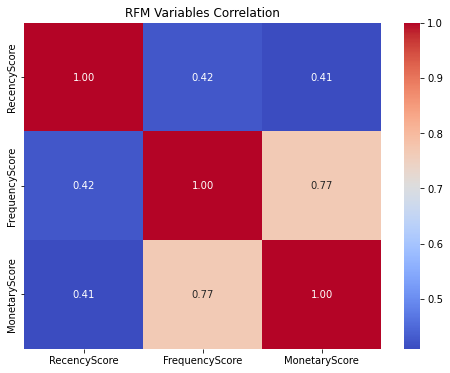

In [42]:
# Calculate correlation matrix
correlation_matrix = rfm_table[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('RFM Variables Correlation')
plt.show()

The heatmap visualization represents this correlation matrix, with colors indicating the strength and direction of the correlation: dark red for a strong positive correlation, dark blue for a strong negative correlation, and lighter colors for weaker correlations. The annotations on the heatmap cells provide the exact correlation coefficient values, aiding in understanding the relationships between the RFM variables and identifying any patterns or trends in the data.

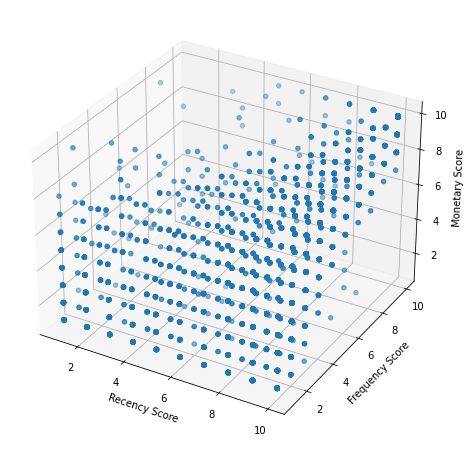

In [43]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_table['RecencyScore'], rfm_table['FrequencyScore'], rfm_table['MonetaryScore'])
ax.set_xlabel('Recency Score')
ax.set_ylabel('Frequency Score')
ax.set_zlabel('Monetary Score')
plt.show()


The provided code generates a 3D scatterplot, offering a visual representation of customer segmentation based on Recency, Frequency, and Monetary (RFM) scores. Each point on the plot symbolizes a customer, positioned according to their respective RFM scores. The x-axis represents Recency Score, reflecting how recently a customer made a purchase. The y-axis represents Frequency Score, indicating how often a customer made purchases. Lastly, the z-axis signifies the Monetary Score, denoting the monetary value of a customer's purchases. By observing the distribution and clustering of points in the 3D space, one can discern patterns and relationships between these RFM variables, facilitating insights into customer behavior and segmentation.

### Normalization

we're using Min-Max Scaling to normalize the RFM (Recency, Frequency, Monetary) scores. This is important because some algorithms, like k-means clustering, are sensitive to the scale of the data. By normalizing the RFM scores, we ensure that all three dimensions are on the same scale, allowing for more accurate and meaningful analysis of customer segmentation.

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the RFM scores
rfm_normalized = rfm_table[['RecencyScore', 'FrequencyScore', 'MonetaryScore']]
rfm_normalized = scaler.fit_transform(rfm_normalized)

# Convert normalized data back to DataFrame
rfm_normalized = pd.DataFrame(rfm_normalized, columns=['RecencyScore', 'FrequencyScore', 'MonetaryScore'])

# Display the normalized RFM scores
print(rfm_normalized.head())


   RecencyScore  FrequencyScore  MonetaryScore
0      1.000000        0.666667       1.000000
1      0.777778        0.333333       0.777778
2      1.000000        0.000000       0.777778
3      0.888889        0.777778       0.888889
4      0.333333        0.000000       0.000000


## Model Building
Finding number of clusters

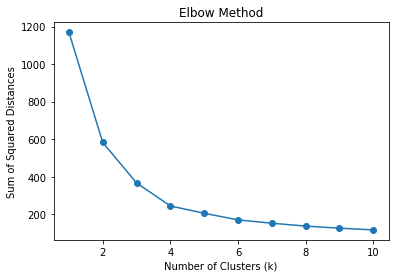

In [45]:
from sklearn.cluster import KMeans


# Initializing a list to store the sum of squared distances
ssd = []

# Try different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_normalized)
    ssd.append(kmeans.inertia_)

# Plotting the sum of squared distances for different values of k
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()


In [46]:
# number of clusters
num_clusters = 3

# Initializing KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans model to the normalized RFM scores
kmeans.fit(rfm_normalized)

# Assign clusters to each customer
rfm_table['Cluster'] = kmeans.labels_

# Display the cluster centers
print("Cluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=['RecencyScore', 'FrequencyScore', 'MonetaryScore']))

# Display the count of customers in each cluster
print("\nCount of Customers in Each Cluster:")
print(rfm_table['Cluster'].value_counts())


Cluster Centers:
   RecencyScore  FrequencyScore  MonetaryScore
0      0.266220        0.061728       0.270817
1      0.871600        0.122543       0.399673
2      0.935289        0.686933       0.873333

Count of Customers in Each Cluster:
1    1973
2    1250
0     846
Name: Cluster, dtype: int64


The cluster centers represent the average RFM scores of customers within each cluster. Subsequently, the count of customers in each cluster is shown above, revealing how many customers belong to each segment. 

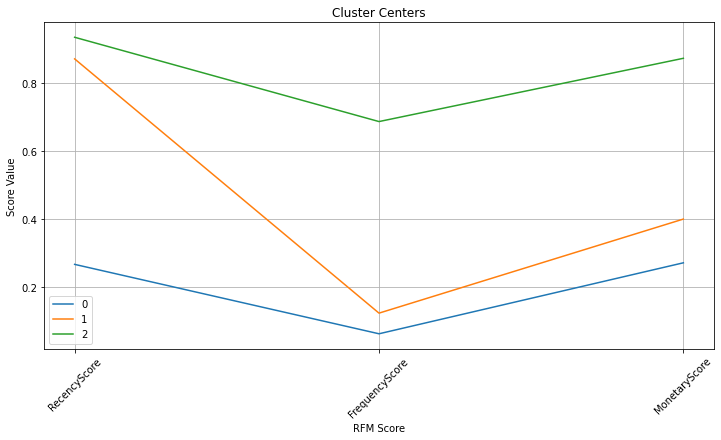

High-Value Segments:
   RecencyScore  FrequencyScore  MonetaryScore
2      0.935289        0.686933       0.873333


In [47]:
# Analyzing Cluster Centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['RecencyScore', 'FrequencyScore', 'MonetaryScore'])

# Visualize Cluster Centers
plt.figure(figsize=(12, 6))
plt.title('Cluster Centers')
plt.xlabel('RFM Score')
plt.ylabel('Score Value')
plt.plot(cluster_centers.T)
plt.legend(cluster_centers.index)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Identify High-Value Segments
high_value_segments = cluster_centers[(cluster_centers['MonetaryScore'] > cluster_centers['MonetaryScore'].mean()) &
                                      (cluster_centers['FrequencyScore'] > cluster_centers['FrequencyScore'].mean()) &
                                      (cluster_centers['RecencyScore'] > cluster_centers['RecencyScore'].mean())]
print("High-Value Segments:")
print(high_value_segments)


CLuster 2 scores suggest that the segment 2 having green cluster consists of customers who have made purchases recently, with a moderate frequency, but have contributed a high monetary value to the business. This segment represents high-value customers(VIP customer) who are worth targeting with tailored marketing strategies to maximize their lifetime value.







